# Chatbot Test

### This document is for to do some tests and train our Bot

In [ ]:
from platform import python_version

In [ ]:
#Check the python version of the environment
print(python_version())

In [ ]:
#Check the Spacy version of the environment
!python -m spacy info

In [4]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer
from chatterbot.trainers import ListTrainer
# Advanced natural language processing.
import spacy
# For connect with the database.
import sqlite3
from sqlite3 import Error
import pandas as pd
import sys
sys.path.append("../")
import os

In [ ]:
# Murphy  will be the name of our bot
chatbot = ChatBot('murphy')
# Create a new trainer for the chatbot
#trainer = ChatterBotCorpusTrainer(chatbot)
"""
Train the chatbot based on the english corpus
"""
#trainer.train("chatterbot.corpus.english")
trainer = ListTrainer(chatbot)
nlp = spacy.load("en_core_web_sm")

In [201]:
chatbot = ChatBot('Murphy',
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
        read_only=True, #To disable the bot to keep storing each question in memory
        logic_adapters=[
        'chatterbot.logic.BestMatch',
        {
            'import_path': 'chatterbot.logic.BestMatch',
            'default_response': 'I am sorry, but I do not understand. I am still learning.',
            'maximum_similarity_threshold': 0.99
        }
    ],
    database_uri='sqlite:///database.sqlite3')

In [ ]:
#How to train the bot.
trainer.train([
    "Hello",
    "Hello",
])

In [ ]:
#Export yml document for check the memory of the bot.
trainer.train("./Covid_checker.yml")

trainer.export_for_training('./Covid_checker.yml')

In [191]:
#Voice Commmands
!say -v Monica "Comandos de Voz"

## Training some phrases.

In [ ]:
# How Train some phrase.
covid19 = [
    "I don't feel good",
    "What symptoms do you have?!",
    "I think I have a fever?",
    "have you measured your body temperature?",
]
trainer.train(covid19)

In [218]:
#trainer = ChatterBotCorpusTrainer(chatbot)
Coronavirus = [
    "I have a 37.3 degree fever",
    "If you have other symptoms, contact with  emergency room."
]
trainer = ListTrainer(chatbot)
trainer.train(Coronavirus)


List Trainer: [####################] 100%


In [ ]:
# Install pandas in the environment
#!pip3 install pandas

## Creating functions

In [ ]:

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)

create_connection("database.sqlite3")

In [ ]:

def select_all_tasks(conn):
    """ Select all the info in the database """
    cur = conn.cursor()
    cur.execute("SELECT * FROM statement")
    """ fetchall --> Returns an array containing all the rows of the result set """
    rows = cur.fetchall()

    for row in rows:
        print(row)

In [ ]:
def main():
    database = "database.sqlite3"

    # create a database connection
    conn = create_connection(database)
    with conn:
        select_task(conn, 1)

In [ ]:
main()

In [ ]:
cur = conn.cursor()
cur.execute("SELECT * FROM latabla")

# Testing SQL operations and connection

In [ ]:
import sqlite3
from sqlite3 import Error


def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select_all(conn):
    cur = conn.cursor()
    cur.execute("SELECT * FROM statement")
    
    rows = cur.fetchall()

    """for row in rows:
        print(row)"""
    # Flattened is used to get a copy of an given array collapsed into one dimension
    flattened = [item for sublist in rows for item in sublist]
    flattened = pd.Series(flattened)

def main():
    database = r"database.sqlite3"

    # create a database connection
    conn = create_connection(database)
    with conn:
        select_all(conn)

main()

In [3]:
# Create connection with DB.
cnx = sqlite3.connect('database.sqlite3')

df = pd.read_sql_query("SELECT * FROM statement", cnx)

In [4]:

df.head()

,id,text,search_text,conversation,created_at,in_response_to,search_in_response_to,persona
0,0,What are the most rare symptoms?,ADJ:symptom,,2021-03-07 22:54:09.170502,How to avoid covid?,,
1,1,What is COVID-19?,PRON:be,training,2021-03-07 20:25:45.210849,None,,
2,2,Coronavirus disease (COVID-19) is an infectiou...,PROPN:disease PROPN:infectious ADJ:disease NOU...,training,2021-03-07 20:25:45.220443,What is COVID-19?,PRON:be,
3,5,Are there long-term effects of COVID-19?,ADJ:term NOUN:effect,training,2021-03-07 20:29:27.212799,None,,
4,6,"Some people who have had COVID-19, whether the...",NOUN:need VERB:hospitalization NOUN:continue V...,training,2021-03-07 20:29:27.222888,Are there long-term effects of COVID-19?,ADJ:term NOUN:effect,


In [ ]:
df = pd.read_sql_query("SELECT text FROM statement", cnx)
df.sample(5)

In [ ]:
def select_all(conn):
    cur = conn.cursor()
    cur.execute("SELECT * FROM statement")

    rows = cur.fetchall()

    """for row in rows:
        print(row)"""
    
    #ola = pd.Series(rows)
    #print(rows)
    #print(type(rows))
    #print(len(rows))
    flattened = [item for sublist in rows for item in sublist]
    df = pd.DataFrame(flattened)
    #print(flattened)
    print(df)

In [29]:
import re
from flask_jsonpify import jsonpify

In [ ]:

df = pd.read_sql_query("SELECT text FROM statement",cnx)
df_list = df.values.tolist()
df.head()

# Testing regexr operations and connection

In [30]:
def reg (txto):
    patron = "\d{2}[\.\d]*"
    b = [re.findall(patron, i) for i in txto]
    nueva_lista = []
    for i in b:
        try:
            #condición rango numeros
            nueva_lista.append(i[0])
        except:
            pass
    return nueva_lista

In [31]:
cnx = sqlite3.connect('database.sqlite3')
df_1 = pd.read_sql_query("SELECT text,created_at FROM statement",cnx)
df_list = df_1.values.tolist()
df_1.head()

,text,created_at
0,What are the most rare symptoms?,2021-03-07 22:54:09.170502
1,What is COVID-19?,2021-03-07 20:25:45.210849
2,Coronavirus disease (COVID-19) is an infectiou...,2021-03-07 20:25:45.220443
3,Are there long-term effects of COVID-19?,2021-03-07 20:29:27.212799
4,"Some people who have had COVID-19, whether the...",2021-03-07 20:29:27.222888


In [32]:
list(filter(lambda n: (n > 35.0) and (n < 45), numeross))

NameError: name 'numeross' is not defined

In [33]:
(df_1["text"])

0                      What are the most rare symptoms?
1                                     What is COVID-19?
2     Coronavirus disease (COVID-19) is an infectiou...
3              Are there long-term effects of COVID-19?
4     Some people who have had COVID-19, whether the...
                            ...                        
81     Please call 112 if fever continues or increases.
82                           I have a 37.5 degree fever
83     Please call 112 if fever continues or increases.
84                           I have a 37.3 degree fever
85     Please call 112 if fever continues or increases.
Name: text, Length: 86, dtype: object

In [34]:
lista_grados = reg(df_1["text"])
lista_grados

['19',
 '19',
 '19',
 '19',
 '60',
 '19',
 '19',
 '19',
 '19',
 '60',
 '19',
 '60',
 '19',
 '19',
 '19',
 '19',
 '60',
 '19',
 '60',
 '19',
 '60',
 '60',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '60',
 '60',
 '19',
 '39.2',
 '112',
 '40.3',
 '112',
 '40.1',
 '112',
 '39.9',
 '112',
 '39.5',
 '112',
 '38.9',
 '112',
 '38.5',
 '112',
 '38.3',
 '112',
 '38.1',
 '112',
 '37.5',
 '112',
 '37.3',
 '112']

In [35]:
def filtrado_top(listd):
    numb = [float(i) for i in listd]
    filt = list(filter(lambda n: (n > 35.0) and (n < 45), numb))
    return filt

In [36]:
filtrado_top(lista_grados)

[39.2, 40.3, 40.1, 39.9, 39.5, 38.9, 38.5, 38.3, 38.1, 37.5, 37.3]

In [54]:
days = ["2021-3-1","2021-3-2","2021-3-3","2021-3-4","2021-3-5","2021-3-6",
        "2021-3-7","2021-3-8","2021-3-9",
        "2021-3-10","2021-3-11"]

In [38]:
[df_1["text"]]df_1[]

SyntaxError: invalid syntax (<ipython-input-38-042e35cb7d4f>, line 1)

In [39]:
df_1

,text,created_at
0,What are the most rare symptoms?,2021-03-07 22:54:09.170502
1,What is COVID-19?,2021-03-07 20:25:45.210849
2,Coronavirus disease (COVID-19) is an infectiou...,2021-03-07 20:25:45.220443
3,Are there long-term effects of COVID-19?,2021-03-07 20:29:27.212799
4,"Some people who have had COVID-19, whether the...",2021-03-07 20:29:27.222888
...,...,...
81,Please call 112 if fever continues or increases.,2021-03-11 17:19:57.927771
82,I have a 37.5 degree fever,2021-03-11 17:20:05.365919
83,Please call 112 if fever continues or increases.,2021-03-11 17:20:05.383398
84,I have a 37.3 degree fever,2021-03-11 17:20:13.352742


In [40]:
# Aplanar resultados
# Plotear lista grados?


# Query con fecha y grados
# Sacar la lista de tuplas
# Modificar la funcion grados



# Hacer más complejo el patrón de regex

In [41]:
cnx = sqlite3.connect('database.sqlite3')
df_1 = pd.read_sql_query("SELECT text,created_at FROM statement",cnx)
df_list = df_1.values.tolist()
df_1.head()

,text,created_at
0,What are the most rare symptoms?,2021-03-07 22:54:09.170502
1,What is COVID-19?,2021-03-07 20:25:45.210849
2,Coronavirus disease (COVID-19) is an infectiou...,2021-03-07 20:25:45.220443
3,Are there long-term effects of COVID-19?,2021-03-07 20:29:27.212799
4,"Some people who have had COVID-19, whether the...",2021-03-07 20:29:27.222888


In [42]:
cnx = sqlite3.connect('database.sqlite3')
df_2 = pd.read_sql_query("SELECT text FROM statement",cnx)

In [43]:
graph = filtrado_top(lista_grados)

In [44]:
#!pip3 install matplotlib

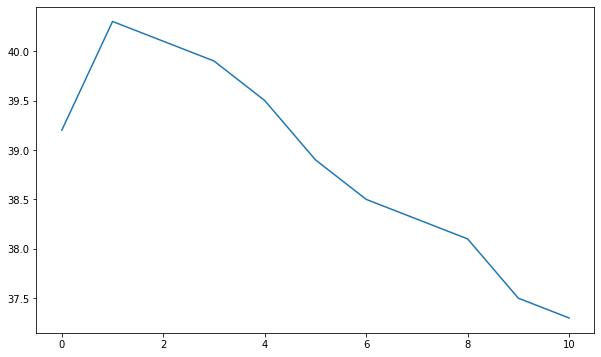

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(graph)
plt.savefig("Ejemplo.jpg")
plt.show()

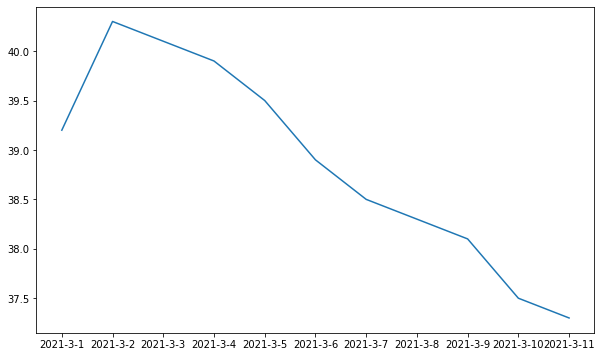

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(days, graph)
plt.savefig("Ejemplo1.jpg")
plt.show()